In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

勾配降下法を使ったピークフィッティングをする想定で、様々はオプティマイザーについて理解する。

ピーク形状はガウシアン関数
$$
Gauss(x, \mu, \sigma) = exp \left( {\dfrac{(x-\mu_2)^2}{2\sigma^2}} \right)
$$
に従うとして、2のピークからなるデータ$D(x,y)$があるとする。

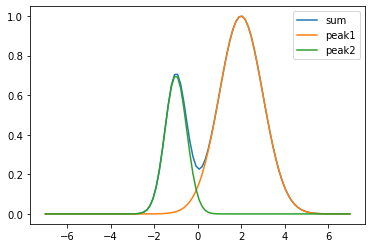

In [29]:
#　標準データ
def gauss(x, mu, simga):
    return np.exp(-(x-mu)**2/(2*simga**2))

N = 100
x = np.linspace(-7, 7, N)
Phi = np.array([gauss(x, 2, 1), gauss(x, -1, 0.5)]).T
w = np.array([1.0, 0.7])
y_true = Phi @ w
plt.plot(x, y_true, label="sum")
plt.plot(x, w[0] * gauss(x, 2, 1), label="peak1")
plt.plot(x, w[1] * gauss(x, -1, 0.5), label="peak2")
plt.legend()

2つのピーク強度$w$、ピークの幅$\sigma$がそれぞれ、$w=(1.0, 0.7), \sigma=(1.0, 0.5)$とわかっているとして(こんな状況はあり得ないが)、最もらしいピークの位置を勾配降下法で求めるとする。つまり、2乗誤差
$$
MSE(\mu_1, \mu_2)=\dfrac{1}{N}\sum^N_{n=1} (\hat{y_n} (\mu_1,\mu_2)-y_n)^2 \\
\hat{y_n}(\mu_1, \mu_2)=1.0exp \left( {\dfrac{(x-\mu_1)^2}{2\times 1.0^2}} \right) + 0.7exp \left( {\dfrac{(x-\mu_2)^2}{2\times 0.5^2}} \right)
$$
が最小になるような$(\mu_1, \mu_2)$を求める。(この場合解析的に解けるけど、本末転倒なのであくまで勾配降下法で頑張る。)この平均２乗誤差を$\mu_1, \mu_2$に対してプロットすると

Text(0.5, 0, '$E$')

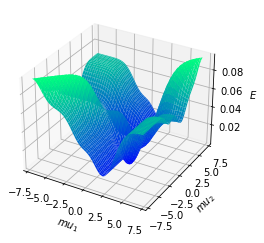

In [16]:
mu1 = np.linspace(-7, 7, 100)
mu2 = np.linspace(-7, 7, 100)

mmu1, mmu2 = np.meshgrid(mu1, mu2)
peak1 = gauss(x.reshape(-1,1,1), np.expand_dims(mmu1, axis=0), 1)
peak2 = gauss(x.reshape(-1,1,1), np.expand_dims(mmu2, axis=0), 0.5)
y_hat = 1.0*peak1 + 0.7 * peak2

MSE = np.sum((y_hat - y_true.reshape([-1, 1, 1]))**2, axis=0) / N
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(mmu1, mmu2, MSE, cmap="winter")
ax.set_xlabel("$mu_1$")
ax.set_ylabel("$mu_2$")
ax.set_zlabel("$E$")

こんな感じで多峰な誤差な誤差関数になっている。わざわざピークフィッティングの問題にしたのは、誤差関数を複雑にするためで、Optimizerのありがたみを感じて欲しいからである。ちょっと複雑すぎた感あるけどきっとAdam君がなんとかしてくれると信じてる。あと、MSEの$\mu_1,\mu_2$の偏微分を求めないと行けないけどなんでもするから許してほしい。ということで、上の標準データをコピーして試してみて欲しい。あと勾配降下し始める初期値や学習率、ハイパラによって結果が変わることとか、アニメーションで出てきたらまじテンアゲ。